In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

import random
N = 10000
d = 10
ads_selected = []
number_of_rewards_1 = [0]*d
number_of_rewards_0 = [0]*d
total_rewards = 0

'''
- ad i gets reward   => y 
- p((cieta)i)        => uniform[0,1] => prior distribution
- likelihood         =>   p( y |{(cieta)i} )
- posterior          =>  p({(cieta)i} | y ) 

 posterior =    liklelihood * prior / intersection.

'''

for person in range(0, N)  :
    ad = 0 
    max_random = 0 
    for round in range(0,d) : 
        random_beta = random.betavariate(number_of_rewards_1[round] + 1 , number_of_rewards_0[round] +1  )
        if random_beta > max_random :
            max_random = random_beta
            ad = round

    ads_selected.append(ad)
    rewards = dataset.values[person , ad]
    if rewards == 1 : 
        number_of_rewards_1[ad] +=1
    if rewards == 0: 
        number_of_rewards_0[ad] +=1
    total_rewards = total_rewards + rewards



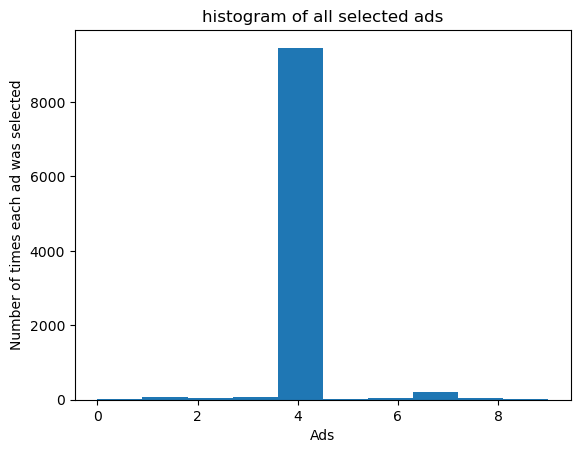

In [7]:
plt.hist(ads_selected)
plt.title("histogram of all selected ads")
plt.xlabel("Ads")
plt.ylabel('Number of times each ad was selected')
plt.show()